<a href="https://colab.research.google.com/github/SergJohn/Crypto-Prediction-2022-Project/blob/main/Prophet_Model_(2)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install --upgrade pandas pip install --upgrade pandas-datareader

In [ ]:
#pip install pandas-datareader


In [ ]:
#!pip install pystan fbprophet


In [ ]:
import pandas as pd
from fbprophet import Prophet

In [ ]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

In [ ]:
# Data1 Using static Dataset from Yahoo Finance, data from 2014 afterwards
#data_btc = pd.read_csv('BTC-USD.csv',index_col = [0])

In [ ]:
# Data2 Getting Yahoo Finance from pdr = data from 2020 afterwards
data_btc = pdr.get_data_yahoo('BTC-USD')
data_et = pdr.get_data_yahoo('ETH-USD')


In [ ]:
data_et.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-09,329.451996,307.056000,308.644989,320.884003,893249984,320.884003
2017-11-10,324.717987,294.541992,320.670990,299.252991,885985984,299.252991
2017-11-11,319.453003,298.191986,298.585999,314.681000,842300992,314.681000
2017-11-12,319.153015,298.513000,314.690002,307.907990,1613479936,307.907990
2017-11-13,328.415009,307.024994,307.024994,316.716003,1041889984,316.716003


In [ ]:
data_btc.info

<bound method DataFrame.info of                     High           Low          Open         Close  \
Date                                                                 
2017-05-07   1596.719971   1559.760010   1579.469971   1596.709961   
2017-05-08   1723.349976   1596.920044   1596.920044   1723.349976   
2017-05-09   1833.489990   1716.300049   1723.890015   1755.359985   
2017-05-10   1788.439941   1719.099976   1756.520020   1787.130005   
2017-05-11   1873.930054   1755.349976   1780.369995   1848.569946   
...                  ...           ...           ...           ...   
2022-05-02  39074.972656  38156.562500  38472.187500  38529.328125   
2022-05-03  38629.996094  37585.621094  38528.109375  37750.453125   
2022-05-04  39902.949219  37732.058594  37748.011719  39698.371094   
2022-05-05  39789.281250  35856.515625  39695.746094  36575.140625   
2022-05-06  36607.585938  35482.132812  36550.769531  36281.000000   

                 Volume     Adj Close  
Date             

In [ ]:
data_et.info

<bound method DataFrame.info of                    High          Low         Open        Close       Volume  \
Date                                                                          
2017-11-09   329.451996   307.056000   308.644989   320.884003    893249984   
2017-11-10   324.717987   294.541992   320.670990   299.252991    885985984   
2017-11-11   319.453003   298.191986   298.585999   314.681000    842300992   
2017-11-12   319.153015   298.513000   314.690002   307.907990   1613479936   
2017-11-13   328.415009   307.024994   307.024994   316.716003   1041889984   
...                 ...          ...          ...          ...          ...   
2022-05-02  2874.145996  2785.522949  2827.614014  2857.410400  18609741545   
2022-05-03  2859.193359  2762.118652  2857.152344  2783.476318  13026093219   
2022-05-04  2956.686768  2779.273682  2783.131104  2940.644775  18186749944   
2022-05-05  2948.960693  2704.916260  2940.226562  2749.213135  22642925048   
2022-05-06  2753.658

In [ ]:
# For Data2 - Transforming the index in a Date columns
data_btc=data_btc.reset_index()

In [ ]:
data_et=data_et.reset_index()

In [ ]:
data_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1826 non-null   datetime64[ns]
 1   High       1826 non-null   float64       
 2   Low        1826 non-null   float64       
 3   Open       1826 non-null   float64       
 4   Close      1826 non-null   float64       
 5   Volume     1826 non-null   int64         
 6   Adj Close  1826 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 100.0 KB


In [ ]:
# For Data2
data_btc.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [ ]:
data_et.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [ ]:
data_btc.tail()

,Date,Close
1821,2022-05-02,38529.328125
1822,2022-05-03,37750.453125
1823,2022-05-04,39698.371094
1824,2022-05-05,36575.140625
1825,2022-05-06,36281.000000


In [ ]:
data_et.tail()

,Date,Close
1635,2022-05-02,2857.410400
1636,2022-05-03,2783.476318
1637,2022-05-04,2940.644775
1638,2022-05-05,2749.213135
1639,2022-05-06,2711.370850


In [ ]:
data_btc.columns = ['ds','y']

In [ ]:
data_et.columns = ['ds','y']

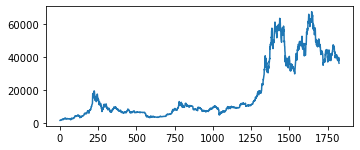

In [ ]:
fig = plt.figure(figsize = (5.5, 5.5))
ax = fig.add_subplot(2, 1, 1)
fig.subplots_adjust(hspace = 0.5)
data_btc['y'].plot(ax = ax)

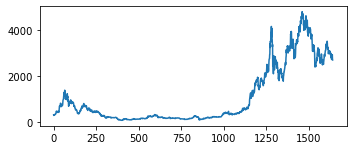

In [ ]:
fig = plt.figure(figsize = (5.5, 5.5))
ax = fig.add_subplot(2, 1, 1)
fig.subplots_adjust(hspace = 0.5)
data_et['y'].plot(ax = ax)

In [ ]:
data_btc.tail()

,ds,y
1821,2022-05-02,38529.328125
1822,2022-05-03,37750.453125
1823,2022-05-04,39698.371094
1824,2022-05-05,36575.140625
1825,2022-05-06,36281.000000


In [ ]:
data_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1826 non-null   datetime64[ns]
 1   y       1826 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 28.7 KB


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
m = Prophet(interval_width=0.95,daily_seasonality=False)
model = m.fit(data_btc)

In [ ]:
m_et = Prophet(interval_width=0.95,daily_seasonality=False)
model_et = m_et.fit(data_et)

In [ ]:
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1921,2022-08-10,41740.648805,31948.350347,51496.515537,36114.816659,46259.189516,-48.908085,-48.908085,-48.908085,49.754693,49.754693,49.754693,-98.662778,-98.662778,-98.662778,0.0,0.0,0.0,41691.740720
1922,2022-08-11,41726.505293,32352.332799,51798.337238,36049.753996,46296.690343,-47.270918,-47.270918,-47.270918,-49.906028,-49.906028,-49.906028,2.635110,2.635110,2.635110,0.0,0.0,0.0,41679.234375
1923,2022-08-12,41712.361781,32688.981670,51485.925106,35984.794290,46334.191170,70.209958,70.209958,70.209958,-28.979112,-28.979112,-28.979112,99.189070,99.189070,99.189070,0.0,0.0,0.0,41782.571739
1924,2022-08-13,41698.218270,31580.187507,50360.144382,35919.834584,46371.691997,212.910006,212.910006,212.910006,22.073053,22.073053,22.073053,190.836953,190.836953,190.836953,0.0,0.0,0.0,41911.128276
1925,2022-08-14,41684.074758,31937.345821,51995.279241,35828.286570,46408.371932,270.906321,270.906321,270.906321,-6.511852,-6.511852,-6.511852,277.418173,277.418173,277.418173,0.0,0.0,0.0,41954.981079


In [ ]:
future = m_et.make_future_dataframe(periods=100, freq='D')
forecast_et = m_et.predict(future)
forecast_et.tail(20)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1720,2022-07-26,3640.116486,2882.899816,4178.473981,3467.864983,3831.357857,-141.049163,-141.049163,-141.049163,2.296860,2.296860,2.296860,-143.346023,-143.346023,-143.346023,0.0,0.0,0.0,3499.067323
1721,2022-07-27,3641.882027,2836.084518,4206.537165,3466.275258,3835.654078,-124.802263,-124.802263,-124.802263,6.946895,6.946895,6.946895,-131.749158,-131.749158,-131.749158,0.0,0.0,0.0,3517.079764
1722,2022-07-28,3643.647568,2855.235983,4197.272806,3465.191493,3839.950299,-123.781945,-123.781945,-123.781945,-3.828859,-3.828859,-3.828859,-119.953086,-119.953086,-119.953086,0.0,0.0,0.0,3519.865624
1723,2022-07-29,3645.413110,2904.667050,4183.373990,3463.506022,3844.246521,-116.518222,-116.518222,-116.518222,-8.472777,-8.472777,-8.472777,-108.045444,-108.045444,-108.045444,0.0,0.0,0.0,3528.894888
1724,2022-07-30,3647.178651,2884.477600,4230.822578,3462.486938,3848.542742,-96.091611,-96.091611,-96.091611,0.017373,0.017373,0.017373,-96.108984,-96.108984,-96.108984,0.0,0.0,0.0,3551.087040
1725,2022-07-31,3648.944192,2919.215854,4254.855671,3461.555210,3854.636209,-82.560859,-82.560859,-82.560859,1.659657,1.659657,1.659657,-84.220516,-84.220516,-84.220516,0.0,0.0,0.0,3566.383334
1726,2022-08-01,3650.709734,2956.637219,4259.129197,3460.623482,3860.947880,-71.069207,-71.069207,-71.069207,1.380852,1.380852,1.380852,-72.450059,-72.450059,-72.450059,0.0,0.0,0.0,3579.640527
1727,2022-08-02,3652.475275,2912.640799,4227.474355,3459.156593,3866.513305,-58.563330,-58.563330,-58.563330,2.296860,2.296860,2.296860,-60.860190,-60.860190,-60.860190,0.0,0.0,0.0,3593.911945
1728,2022-08-03,3654.240816,2927.740334,4355.917171,3458.524338,3870.949627,-42.558707,-42.558707,-42.558707,6.946895,6.946895,6.946895,-49.505602,-49.505602,-49.505602,0.0,0.0,0.0,3611.682109
1729,2022-08-04,3656.006358,2936.572700,4304.225608,3457.443646,3875.333174,-42.261730,-42.261730,-42.261730,-3.828859,-3.828859,-3.828859,-38.432871,-38.432871,-38.432871,0.0,0.0,0.0,3613.744628


In [ ]:
forecast.tail(20)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1906,2022-07-26,41952.801482,30341.829091,48511.259687,37626.381965,45487.039890,-2006.517010,-2006.517010,-2006.517010,-11.462046,-11.462046,-11.462046,-1995.054965,-1995.054965,-1995.054965,0.0,0.0,0.0,39946.284471
1907,2022-07-27,41938.657970,30694.398600,50181.951143,37555.852627,45526.928643,-1813.326657,-1813.326657,-1813.326657,49.754693,49.754693,49.754693,-1863.081349,-1863.081349,-1863.081349,0.0,0.0,0.0,40125.331313
1908,2022-07-28,41924.514458,30548.535300,49035.203180,37485.323289,45565.961036,-1778.901800,-1778.901800,-1778.901800,-49.906028,-49.906028,-49.906028,-1728.995772,-1728.995772,-1728.995772,0.0,0.0,0.0,40145.612658
1909,2022-07-29,41910.370946,30914.316232,50169.384821,37398.520158,45604.993428,-1622.622290,-1622.622290,-1622.622290,-28.979112,-28.979112,-28.979112,-1593.643178,-1593.643178,-1593.643178,0.0,0.0,0.0,40287.748656
1910,2022-07-30,41896.227435,31616.777716,49059.152782,37266.932571,45644.025821,-1435.743998,-1435.743998,-1435.743998,22.073053,22.073053,22.073053,-1457.817052,-1457.817052,-1457.817052,0.0,0.0,0.0,40460.483436
1911,2022-07-31,41882.083923,31090.784124,50204.164350,37185.268544,45683.058214,-1328.764949,-1328.764949,-1328.764949,-6.511852,-6.511852,-6.511852,-1322.253096,-1322.253096,-1322.253096,0.0,0.0,0.0,40553.318974
1912,2022-08-01,41867.940411,31041.991635,49463.813071,37098.682765,45752.802036,-1162.593694,-1162.593694,-1162.593694,25.031293,25.031293,25.031293,-1187.624987,-1187.624987,-1187.624987,0.0,0.0,0.0,40705.346717
1913,2022-08-02,41853.796899,31257.197166,50435.084781,36970.646707,45823.428136,-1066.004188,-1066.004188,-1066.004188,-11.462046,-11.462046,-11.462046,-1054.542142,-1054.542142,-1054.542142,0.0,0.0,0.0,40787.792712
1914,2022-08-03,41839.653388,32157.913114,50415.182399,36864.438523,45894.054236,-873.794715,-873.794715,-873.794715,49.754693,49.754693,49.754693,-923.549408,-923.549408,-923.549408,0.0,0.0,0.0,40965.858672
1915,2022-08-04,41825.509876,30958.753927,50679.130653,36762.115712,45964.680337,-845.034550,-845.034550,-845.034550,-49.906028,-49.906028,-49.906028,-795.128522,-795.128522,-795.128522,0.0,0.0,0.0,40980.475326


In [ ]:
forecast[['ds','yhat']]

,ds,yhat
0,2017-05-07,2904.324833
1,2017-05-08,2925.581783
2,2017-05-09,2860.851272
3,2017-05-10,2875.782637
4,2017-05-11,2712.081287
...,...,...
1921,2022-08-10,41691.740720
1922,2022-08-11,41679.234375
1923,2022-08-12,41782.571739
1924,2022-08-13,41911.128276


In [ ]:
forecast_et[['ds','yhat']]

,ds,yhat
0,2017-11-09,959.619356
1,2017-11-10,946.191139
2,2017-11-11,945.732155
3,2017-11-12,938.384186
4,2017-11-13,929.188656
...,...,...
1735,2022-08-10,3694.015986
1736,2022-08-11,3693.445826
1737,2022-08-12,3698.613653
1738,2022-08-13,3716.530615


In [ ]:
train = data_btc['y']
test = forecast['yhat'][:1826].values

mae = mean_absolute_error(train, test)
print('MAE: %.3f' % mae)


print(f'r^2 score = {r2_score(train,test)}')

MAE: 3096.982
r^2 score = 0.9407211980906783


In [ ]:
train_et = data_et['y']
test_et = forecast_et['yhat'][:1640].values

mae_et = mean_absolute_error(train_et, test_et)
print('MAE: %.3f' % mae)


print(f'r^2 score = {r2_score(train_et,test_et)}')

MAE: 3096.982
r^2 score = 0.9324448123008249


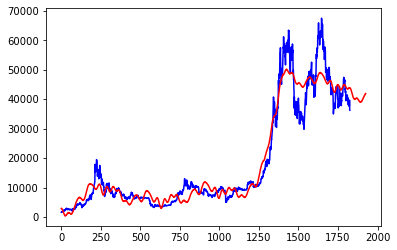

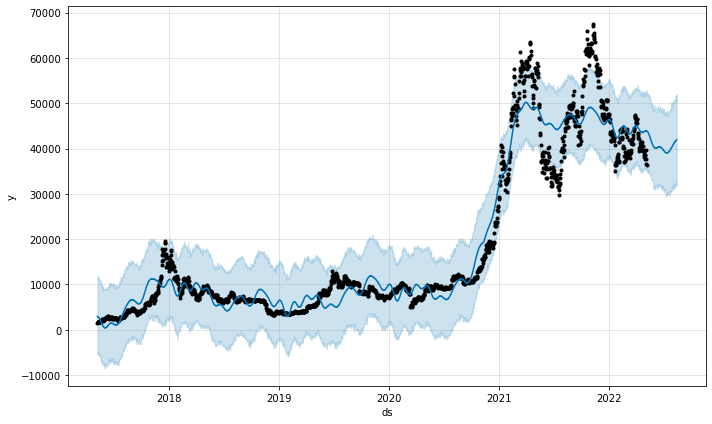

In [ ]:
data_btc['y'].plot(color='b', linestyle = '-')
forecast['yhat'].plot(color='r', linestyle = '-')
plot = m.plot(forecast)


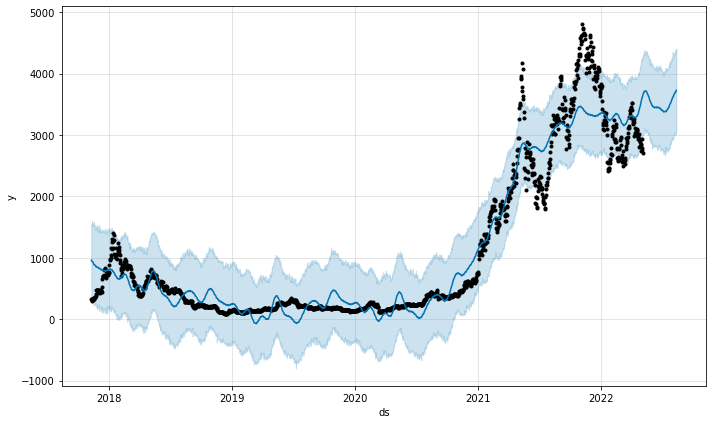

In [ ]:
plot =m_et.plot(forecast_et)

In [ ]:
#pip install dash

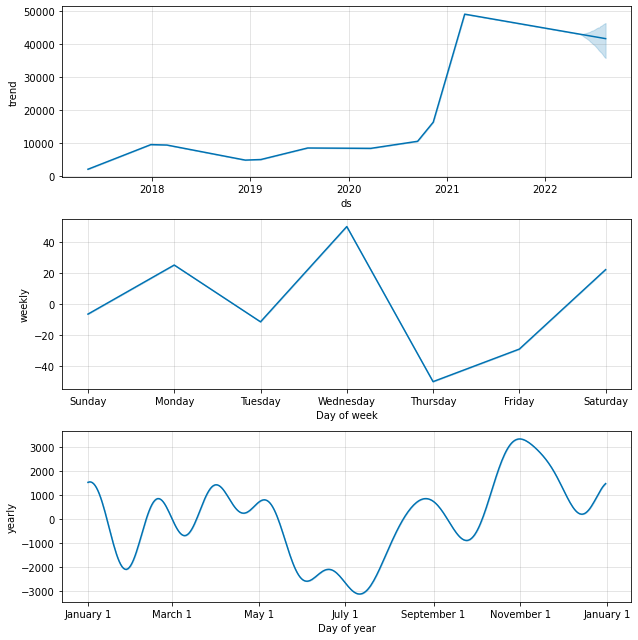

In [ ]:
plot2 = m.plot_components(forecast)

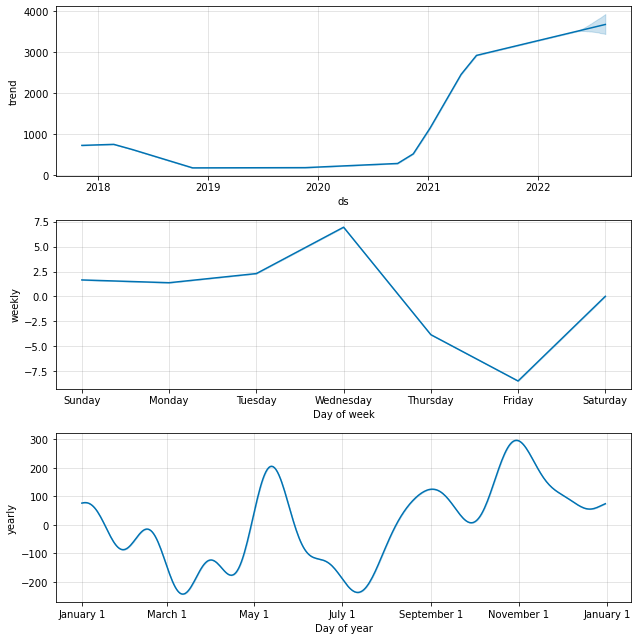

In [ ]:
plot2 = m_et.plot_components(forecast_et)

# SIMPLE SMOOTHING

In [ ]:
#!pip install pandas==1.1.3

In [ ]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import pandas as pd
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing

In [ ]:
df = pdr.get_data_yahoo('BTC-USD')

In [ ]:
df.drop(['High', 'Low', 'Open', 'Volume', 'Adj Close'], axis=1, inplace=True)

In [ ]:
df=df.reset_index()

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])
df.tail()

,Date,Close
1821,2022-05-02,38529.328125
1822,2022-05-03,37750.453125
1823,2022-05-04,39698.371094
1824,2022-05-05,36575.140625
1825,2022-05-06,36293.035156


In [ ]:
HORIZON = 10

model = ExponentialSmoothing(endog = df['Close'])
results = model.fit()

preds = results.get_forecast(steps=HORIZON)

preds.summary_frame(alpha=0.2).head()

Close,mean,mean_se,mean_ci_lower,mean_ci_upper
1826,36303.964179,983.218147,35043.919424,37564.008934
1827,36303.964179,1370.215962,34547.961768,38059.966590
1828,36303.964179,1669.810062,34164.016481,38443.911877
1829,36303.964179,1923.288720,33839.170509,38768.757849
1830,36303.964179,2147.047591,33552.411977,39055.516381


In [ ]:
print(results.forecast(steps=1))

1826    36303.964179
dtype: float64


In [ ]:
x = results.forecast(steps=1)
print(x)
if x.item() > 36996.509921:
    print('yes')
else:
    print('No')

1826    36303.964179
dtype: float64
No


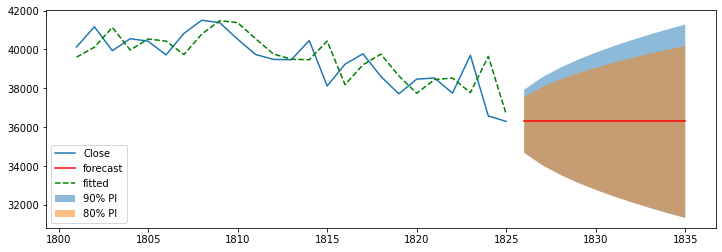

In [ ]:
ax = df['Close'].iloc[-25:].plot(figsize=(12,4))
forecast_80 = preds.summary_frame(alpha=0.2)[['mean', 'mean_ci_lower', 'mean_ci_upper']]
forecast_90 = preds.summary_frame(alpha=0.1)[['mean', 'mean_ci_lower', 'mean_ci_upper']]

ax.fill_between(forecast_90.index, forecast_90['mean_ci_lower'], forecast_90['mean_ci_upper'], alpha=0.5, label='90% PI')
ax.fill_between(forecast_80.index, forecast_90['mean_ci_lower'], forecast_80['mean_ci_upper'], alpha=0.5, label='80% PI')

forecast_80['mean'].iloc[-25:].plot(ax=ax, label='forecast', color='red')

results.fittedvalues.iloc[-25:]

results.fittedvalues.iloc[-25:].plot(ax=ax, label='fitted', color='green', linestyle='--')

ax.legend(loc=3)

In [ ]:
df.head()

,Date,Close
0,2017-05-07,1596.709961
1,2017-05-08,1723.349976
2,2017-05-09,1755.359985
3,2017-05-10,1787.130005
4,2017-05-11,1848.569946


In [ ]:
forecast_80.head()

Close,mean,mean_ci_lower,mean_ci_upper
1826,36303.964179,35043.919424,37564.008934
1827,36303.964179,34547.961768,38059.966590
1828,36303.964179,34164.016481,38443.911877
1829,36303.964179,33839.170509,38768.757849
1830,36303.964179,33552.411977,39055.516381


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Exponential Smoothing Results                         
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1826
Model:                   ETS(A, N, N)   Log Likelihood              -15173.639
Date:                Fri, 06 May 2022   AIC                          30353.278
Time:                        16:25:36   BIC                          30369.808
Sample:                             0   HQIC                         30359.376
                               - 1826   Scale                       966717.924
Covariance Type:                  opg                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
smoothing_level     0.9706      0.015     65.955      0.000       0.942       0.999
initial_level    1596.7100   2.59e+05      0.006      0.995   -5.06e+05    5.09e+05
===================================================================================
Ljung-Box (Q):                      136.20   Jarque-Bera (JB):              8631.90
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              13.93   Skew:                            -0.15
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd

from itertools import product
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

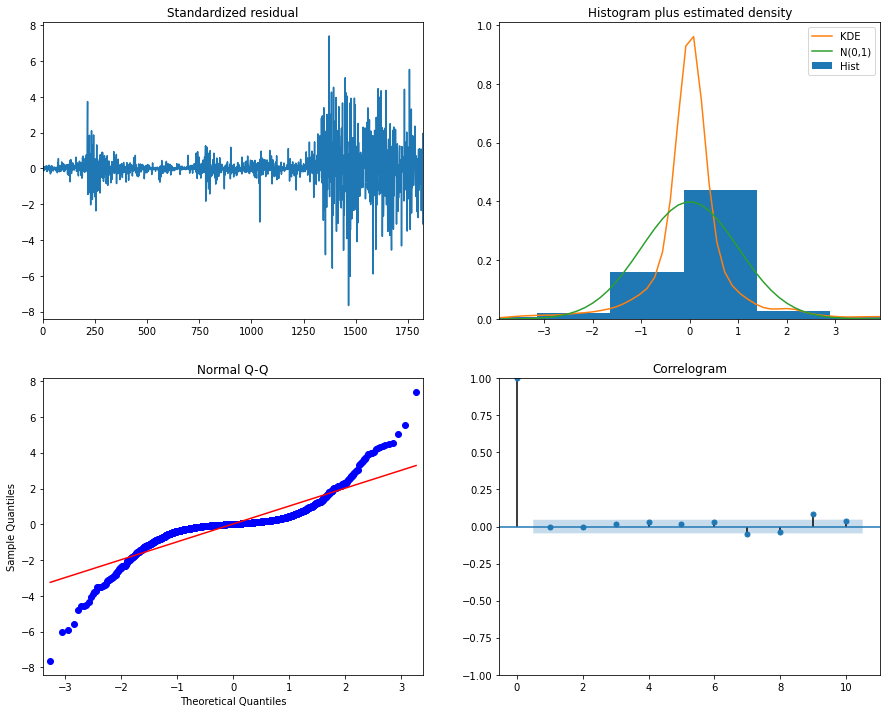

In [ ]:
# Diagnosing the model residuals
results.plot_diagnostics(figsize = (15, 12))
plt.show()

In [ ]:
# Divide into train and validation set to calculate R-squared score
train = df[:int(0.85 * (len(df)))]
test  = df[int(0.85 * (len(df))):]

train.shape, test.shape

((1552, 2), (274, 2))

In [ ]:
start = len(train)
end   = len(train) + len(test) - 1
predictions = results.predict(start = start, end = end, dynamic = False, typ = 'levels').rename('Simple Exponential Smoothing Predictions')
print(predictions)

1552    40835.256373
1553    42758.318325
1554    44503.015481
1555    43818.817400
1556    46290.618721
            ...     
1821    38447.746023
1822    38526.932365
1823    37773.255400
1824    39641.837685
1825    36665.197985
Name: Simple Exponential Smoothing Predictions, Length: 274, dtype: float64


In [ ]:
# Create a dataframe to store r2 score
evaluation_results = pd.DataFrame({'r2_score': r2_score(test['Close'], predictions)}, index = [0])

# Display the results
evaluation_results

,r2_score
0,0.958025


In [ ]:
#pip install dash_bootstrap_components

In [ ]:
#pip uninstall dash

In [ ]:
import dash
import dash_html_components as html
import plotly.graph_objects as go
import dash_core_components as dcc
import plotly.express as px
from dash.dependencies import Input, Output
from dash import Dash, dcc, html, Input, Output, State,callback_context, dash_table



app = dash.Dash()

In [ ]:
app.layout = html.Div([

html.Div([
    html.Img( src = 'https://freepngimg.com/thumb/bitcoin/59620-cryptocurrency-bitcoin-free-frame.png',
             style = {'width':'150px','display':'block', 'margin-left':'auto', 'margin-right':'auto'}),
    
    html.H1(id = 'H1', children = 'Crypto Prediction', style = {'textAlign':'center',\
                                            'marginTop':40,'marginBottom':40})
    ]),

    
html.Div([       
        html.H1(id = 'H3',children = 'Bitcoin', style = {'textAlign':'center',\
                                            'marginTop':40,'marginBottom':40}),
        dcc.Dropdown( id = 'dropdown',
        options = [
            {'label':'Prophet', 'value':'Prof' },
            {'label': 'ARIMA', 'value':'arm'},
            {'label': 'Smoothing', 'value':'smt'},
            ],
        value = 'arm', style = {'background-color': 'lightblue'}),
        dcc.Graph(id = 'bar_plot')
        
    ]),

html.Div([       
            
        html.H1(id = 'H2',children = 'Ethereum ', style = {'textAlign':'center',\
                                            'marginTop':40,'marginBottom':40}),
        dcc.Dropdown( id = 'dropdown_et',
        options = [
            {'label':'Prophet', 'value':'Profs' },
            {'label': 'ARIMA', 'value':'arms'},
            {'label': 'Smoothing', 'value':'smts'},
            ],
        value = 'arms', style = {'background-color': 'lightblue'}),
        dcc.Graph(id = 'bar_plot_et')
        
    ]),
    

html.Div([
    html.Button('10 Days Prediction Prophet model', id='btn-nclicks-1', n_clicks=0, style={'font-size': '12px', 'width': '140px', 'display': 'inline-block', 'margin-bottom': '10px', 'margin-right': '5px', 'height':'37px', 'verticalAlign': 'top'}),
    html.Button('10 Days Prediction Arima model', id='btn-nclicks-2', n_clicks=0, style={'font-size': '12px', 'width': '140px', 'display': 'inline-block', 'margin-bottom': '10px', 'margin-right': '5px', 'height':'37px', 'verticalAlign': 'top'}),
    html.Button('10 Days Prediction Smoothing model', id='btn-nclicks-3', n_clicks=0, style={'font-size': '12px', 'width': '140px', 'display': 'inline-block', 'margin-bottom': '10px', 'margin-right': '5px', 'height':'37px', 'verticalAlign': 'top'}),
    html.Div(id='container-button-timestamp'),
    
], )
    #style={'display':'flex','justify-content':'center', 'align-items':'center'}



    
   
    ])

In [ ]:
@app.callback(Output(component_id='bar_plot', component_property= 'figure'),
              [Input(component_id='dropdown', component_property= 'value')])

def graph_update(dropdown_value):
    print(dropdown_value)
    
    if dropdown_value == 'Prof':
        fig = go.Figure()
        
        fig.add_trace(go.Scatter(x = forecast['ds'],y = forecast['yhat'],\
                     line = dict(color = 'firebrick', width = 4), name = 'prophet'
                     ))
        fig.add_trace(go.Scatter(x = forecast_et['ds'],y = forecast_et['yhat'],\
                     line = dict(color = 'blue', width = 4), name = 'prophet'
                     ))
        fig.update_layout(title = 'Prices over time',
                      xaxis_title = 'Dates',
                      yaxis_title = 'Prices'
                      )
        return fig

    elif dropdown_value == 'arm':

        fig_two = go.Figure([go.Scatter(x = forecast['ds'],y = forecast['yhat'],\
                     line = dict(color = 'firebrick', width = 4))
                     ])
        fig_two.update_layout(title = 'Prices over time',
                      xaxis_title = 'Dates',
                      yaxis_title = 'Prices'
                      )    

        return fig_two  
                                 
    elif dropdown_value == 'smt':
        fig_three = go.Figure()
        
        fig_three.add_trace(go.Scatter(x = df['date'],y =  df['Close'].iloc[-25:],\
                     line = dict(color = 'green', width = 4)
                     ))
        fig_three.add_trace(go.Scatter(x = forecast_80['Close'], y = forecast_80['mean'].iloc[:25],\
                     line = dict(color = 'firebrick', width = 4)
                     ))
        #fig_three.add_trace(go.Scatter(y = results.fittedvalues.iloc[-25:],\
                     #line = dict(color = 'blue', width = 4)
                     #))
        
        fig_three.update_layout(title = 'Prices over time',
                      xaxis_title = 'Dates',
                      yaxis_title = 'Prices'
                      )    
 
        return fig_three
    
    else:
        print('test')
        

In [ ]:
@app.callback(Output(component_id='bar_plot_et', component_property= 'figure'),
              [Input(component_id='dropdown_et', component_property= 'value')])

def graph_update(dropdown_value):
    print(dropdown_value)
    
    if dropdown_value == 'Profs':
        fig = go.Figure()
        fig.add_trace(go.Scatter(x = forecast['ds'],y = forecast['yhat'],\
                     line = dict(color = 'firebrick', width = 4), name = 'prophet'
                     ))
        fig.add_trace(go.Scatter(x = forecast_et['ds'],y = forecast_et['yhat'],\
                     line = dict(color = 'blue', width = 4), name = 'prophet'
                     ))
        fig.update_layout(title = 'Prices over time',
                      xaxis_title = 'Dates',
                      yaxis_title = 'Prices'
                      )
        return fig

    elif dropdown_value == 'arms':

        fig_two = go.Figure([go.Scatter(x = forecast['ds'],y = forecast['yhat'],\
                     line = dict(color = 'firebrick', width = 4))
                     ])
        fig_two.update_layout(title = 'Prices over time',
                      xaxis_title = 'Dates',
                      yaxis_title = 'Prices'
                      )    

        return fig_two  
                                 
    elif dropdown_value == 'smts':
        fig_three = go.Figure()
        
        fig_three.add_trace(go.Scatter(x = df['date'],y =  df['Close'].iloc[-25:],\
                     line = dict(color = 'green', width = 4)
                     ))
        fig_three.add_trace(go.Scatter(x = forecast_80['Close'], y = forecast_80['mean'].iloc[:25],\
                     line = dict(color = 'firebrick', width = 4)
                     ))
        #fig_three.add_trace(go.Scatter(y = results.fittedvalues.iloc[-25:],\
                     #line = dict(color = 'blue', width = 4)
                     #))
        
        fig_three.update_layout(title = 'Prices over time',
                      xaxis_title = 'Dates',
                      yaxis_title = 'Prices'
                      )    
 
        return fig_three
    
    else:
        print('test')

In [ ]:
@app.callback(
    Output('container-button-timestamp', 'children'),
    Input('btn-nclicks-1', 'n_clicks'),
    Input('btn-nclicks-2', 'n_clicks'),
    Input('btn-nclicks-3', 'n_clicks')
)
def displayClick(btn1, btn2, btn3):
    changed_id = [p['prop_id'] for p in callback_context.triggered][0]
    if 'btn-nclicks-1' in changed_id:
        
        
        msg = 'Predictions for 10 days'

        fig = go.Figure(data=[go.Table(
            header=dict(values=['Date','Price'],
                        #fill_color='paleturquoise',
                        align='left'), 
            cells=dict(values=[forecast['ds'][1826:1836], forecast['yhat'][1826:1836]],
               #fill_color='lavender',
               align='left'))
        ])
        return dcc.Graph(figure=fig)
        
        
                      

    elif 'btn-nclicks-2' in changed_id:
        msg = 'Button 2 was most recently clicked'
    elif 'btn-nclicks-3' in changed_id:
        msg = 'Button 3 was most recently clicked'
    else:
        msg = 'Button 3 was most recently clicked'
        
    return html.Div(msg)


In [ ]:

if __name__ == '__main__': 
    app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/



INFO:__main__:Dash is running on http://127.0.0.1:8050/



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
INFO:werkzeug:127.0.0.1 - - [06/May/2022 21:18:18] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/May/2022 21:18:18] "GET /_dash-layout HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/May/2022 21:18:18] "GET /_dash-dependencies HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/May/2022 21:18:18] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/May/2022 21:18:18] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/May/2022 21:18:18] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/May/2022 21:18:18] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/May/2022 21:18:19] "POST /_dash-update-component HTTP/1.1" 200 -


armarms



INFO:werkzeug:127.0.0.1 - - [06/May/2022 21:18:19] "POST /_dash-update-component HTTP/1.1" 200 -
